In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Assumptions of Linear Regression

Linear regression models have the following underlying assumptions
- The true relationship is linear
- No multicollinearity between independent variables
- Errors are normally distributed with mean 0
- Homoscedasticity of errors (or, constant variance around the line).
- Independence of the observations

How do we check these assumptions?  
For most of them, we use the residuals.

# Checking Each Assumption

## Linearity

This assumption can be checked by using scatterplots.  
We will plot the dependent variable against every independent variable.

In [2]:
df = pd.read_csv('Advertising.csv', index_col = 0 )
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


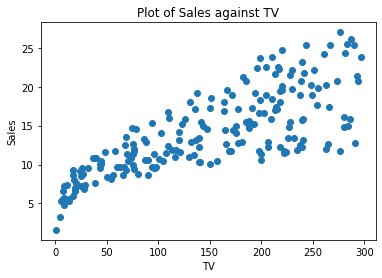

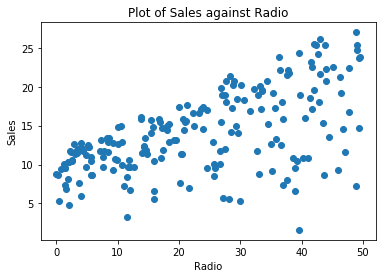

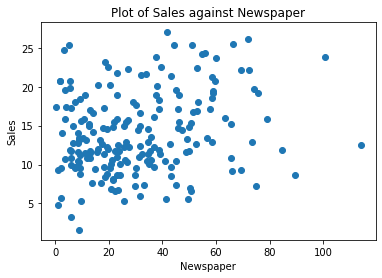

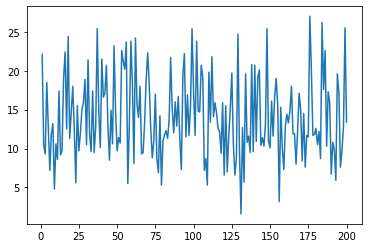

In [3]:
features = ['TV', 'Radio', 'Newspaper']

for x in features:
    plt.scatter(df[x], df['Sales'])
    plt.title('Plot of Sales against ' + x)
    plt.xlabel(x)
    plt.ylabel('Sales')
    plt.show()
    
plt.plot(df['Sales'])
plt.show()

A quicker solution is to use Seaborn's `pairplot`.  

This lets us check for linearity and multicollinearity at the same time.

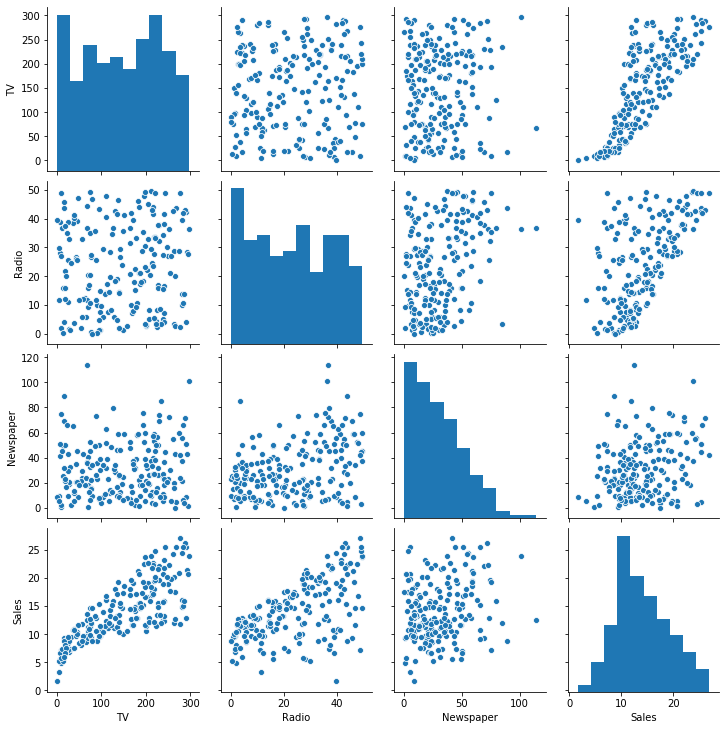

In [8]:
sns.pairplot(df)
plt.show()

### Calculate Pearson's R Value
Pearson's R represents a correlation coefficient. So a Pearson's R > .5  means there is a positive correlation between the feature. We can see that ```sqft_living``` show a positive correlation


In [14]:
df.corr().Sales.sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

## Multicollinearity

### Calculate VIF

The variance inflation factor is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone.
It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. 
It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

In [21]:
# select only columns with datatype int64 or float 64
df_independents = df.drop(axis=1, columns=['Sales'])

vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF Score"] = [variance_inflation_factor(df_independents.values, i) for i in range(df_independents.shape[1])]

# label the scores with their related columns
vif["features"] = df_independents.columns

vif

,VIF Score,features
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


If VIF > 5 there is an _indication_ that multicollinearity may be present; with VIF > 10 there is **certainly** multicollinearity among the variables.

# Residuals

We are concerned about the following when it comes to residuals:\
- not autocorrelated
- constant variance
- normally distributed

In a nutshell:

<img src="img/error-dist.jpeg" width="550">  


#### Typical Residuals vs. Fitted plots:


- **The ideal scenario**
    - Random scatter
    - Scattered around 0
    - No identifiable trend
    
    - **Fix:** Introduce polynomial terms 
    
    <img src="img/normal-resid.png" width="550">  
    
- **Non-linear relationship**
    - Clear non-linear scatter
    - identifiable trend
    
    - **Fix:** Variable transformation
    
    <img src="img/polynomial-resid.png" width="550">

- **Autocorrelation**
    - Identifiable trend, or
    - Consecutively positive/negative residuals
    
    - **Fix:** Consider sequential analysis methods
    
    <img src="img/autocorrelation.png" width="550">

- **Heteroskedasticity**
    - The spread of residuals is different at different levels of the fitted values
    
    - **Fix:** Variable transformation (log)  
    Identify other assumption violations
    
    <img src="img/heteroskedasticity.png" width="550">
    
The above plots were created using `seaborn.residplot` 

### Residuals Plots - Checking Errors are normal
Before we compare which model best predicts our target, we want to ensure that our predicted errors are normally distributed. 

In [29]:
X = df.Newspaper # Set X to Newspaper values
y = df.Sales # Set y to Sales values
X2 = sm.add_constant(X) # add intercept column
est = sm.OLS(y, X2).fit() # Pass in X2 and y into Ordinary Least Square model
print(est.summary()) # Print out the report summary 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 23 Jun 2020   Prob (F-statistic):            0.00115
Time:                        15:45:40   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

### Normality

There are several ways to test for normality.

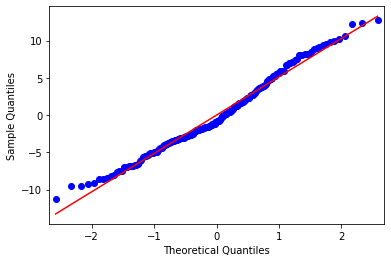

In [36]:
# QQ plots do not indicate statistical significance, but are generally great tools for checking for normality.
res = est.resid
fig = sm.qqplot(res, line = 'r')

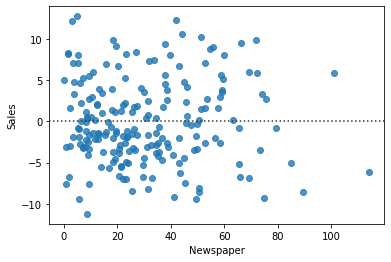

In [27]:
x = df.Newspaper
y = df.Sales
sns.residplot(x,y)

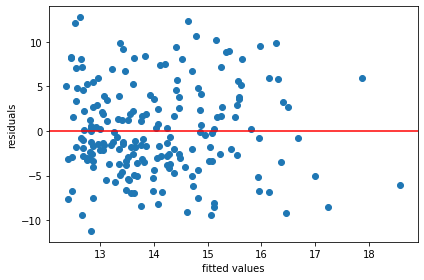

In [45]:
plt.scatter(est.predict(), residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.tight_layout()

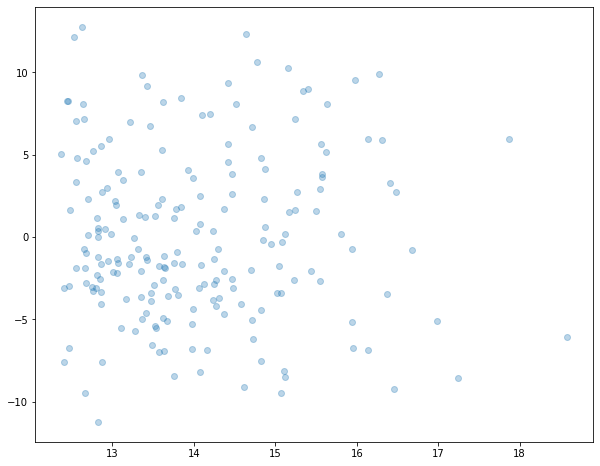

In [42]:
pred_val = est.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, residuals, alpha = 0.3)

## Other Potential Problems

- Outliers

    <img src='img/outliers.png' width=450>

    For more on Studentized residuals, check:

    [PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

    [Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- High Leverage Points 

    <img src='img/leverage.png' width=450>

    For more details on leverage read:

    p97 of ISLR

    [Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

    [Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

    [A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)



### Some great resources

- [Duke Stats](http://people.duke.edu/~rnau/testing.htm) 

- Page 97 of ISLR

- [Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

- Statsmodels [Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- A [blogpost](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/) with implementation
